   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


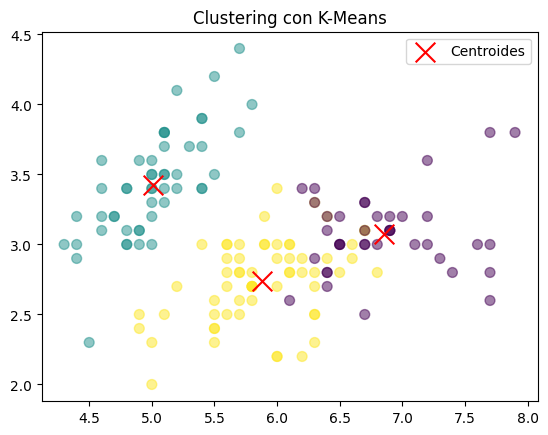

In [3]:
import pandas as pd
from sklearn import datasets

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()

# Convertirlo en un DataFrame de Pandas
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Agregar la columna de especies

# Mostrar las primeras filas
print(df.head())

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Separar características y etiquetas
X = iris.data
y = iris.target

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar modelo de Regresión Logística
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Obtener etiquetas de los clusters
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizar resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroides")
plt.title("Clustering con K-Means")
plt.legend()
plt.show()


In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular precisión
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision:.2f}")

# Mostrar matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", matriz_confusion)

# Reporte de métricas Precision, Recall y F1-score
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Precisión del modelo: 1.00
Matriz de Confusión:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Reporte de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

